# Analyse Psylab Sarah, Ginny, Emily

## Preparation: Imports and Stuff, load Dataset

In [6]:
from os.path import join, dirname, abspath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [7]:
print(abspath("."))

C:\Users\sarah\Documents\Documents\Uni\Experimental_psychology_lab\Our_project\XPLab_Conformity\Analyses\main


In [8]:
df = pd.read_csv("./results_281_Group8_Conformity_Pilot_Group8.csv")

In [9]:
with pd.option_context('display.max_columns', 9999, 'display.max_rows', 10):
    display(df.head())

,submission_id,QUD,RT,age,comments,education,endTime,experiment_id,gender,id,languages,option1,option2,option3,option4,option5,optionLeft,optionRight,question,response,s1,s2,s3,s4,s5,startDate,startTime,text1,text2,timeSpent,trial_name,trial_number
0,2786,NaN,NaN,19.0,NaN,Graduated High School,1629714540687,281,male,s1,Spanisch und Guaraní,Animal Products,Protesting,Vaccine against Covid-19,Abortion,Political Orientation,NaN,NaN,Which out of these topics do you care about th...,Animal Products,NaN,NaN,NaN,NaN,NaN,Mon Aug 23 2021 12:28:10 GMT+0200 (CEST),1629714490648,NaN,NaN,0.833983,sentence_customized,1
1,2786,NaN,NaN,19.0,NaN,Graduated High School,1629714540687,281,male,NaN,Spanisch und Guaraní,NaN,NaN,NaN,NaN,NaN,Strongly Disagree,Strongly Agree,NaN,+3,People should not buy or eat animal products,It is alright if political protesters use viol...,Everybody who is medically suited to receive a...,Abortion should be illegal,I am politically oriented towards the left,Mon Aug 23 2021 12:28:10 GMT+0200 (CEST),1629714490648,NaN,NaN,0.833983,rating_choice,1
2,2786,NaN,NaN,19.0,NaN,Graduated High School,1629714540687,281,male,3,Spanisch und Guaraní,NaN,NaN,NaN,NaN,NaN,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,-1,NaN,NaN,NaN,NaN,NaN,Mon Aug 23 2021 12:28:10 GMT+0200 (CEST),1629714490648,<br/><br/>Approximately 60% of the other part...,Imagine you have witnessed someone rob a bank....,0.833983,moral_dilemma_2A,1
3,2786,NaN,NaN,19.0,NaN,Graduated High School,1629714540687,281,male,s1,Spanisch und Guaraní,Participants chose which action they preferred.,"Due to a computer error, participants were not...",No data was saved during the experiment.,The participants completed the experiment with...,I don't understand what is happening here.,NaN,NaN,"To ensure you understood the assignment, pleas...",Participants chose which action they preferred.,NaN,NaN,NaN,NaN,NaN,Mon Aug 23 2021 12:28:10 GMT+0200 (CEST),1629714490648,NaN,NaN,0.833983,understanding_choice,1
4,2786,NaN,6853.0,19.0,NaN,Graduated High School,1629714540687,281,male,NaN,Spanisch und Guaraní,NaN,NaN,NaN,NaN,NaN,happy,sad,How do you feel about your choice?,3,NaN,NaN,NaN,NaN,NaN,Mon Aug 23 2021 12:28:10 GMT+0200 (CEST),1629714490648,NaN,NaN,0.833983,emotions_fake,1


## Clean Dataset

* remove superflous columns and rows
* make cleaner format (one row per participant, ...)

In [10]:
df = df.drop(columns=["QUD","RT", "age", "comments", "education", "endTime", "experiment_id", "gender", "id", "languages", "startDate", "startTime", "text2", "timeSpent", "trial_name",  "trial_number"])
df.head()

,submission_id,option1,option2,option3,option4,option5,optionLeft,optionRight,question,response,s1,s2,s3,s4,s5,text1
0,2786,Animal Products,Protesting,Vaccine against Covid-19,Abortion,Political Orientation,NaN,NaN,Which out of these topics do you care about th...,Animal Products,NaN,NaN,NaN,NaN,NaN,NaN
1,2786,NaN,NaN,NaN,NaN,NaN,Strongly Disagree,Strongly Agree,NaN,+3,People should not buy or eat animal products,It is alright if political protesters use viol...,Everybody who is medically suited to receive a...,Abortion should be illegal,I am politically oriented towards the left,NaN
2,2786,NaN,NaN,NaN,NaN,NaN,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,-1,NaN,NaN,NaN,NaN,NaN,<br/><br/>Approximately 60% of the other part...
3,2786,Participants chose which action they preferred.,"Due to a computer error, participants were not...",No data was saved during the experiment.,The participants completed the experiment with...,I don't understand what is happening here.,NaN,NaN,"To ensure you understood the assignment, pleas...",Participants chose which action they preferred.,NaN,NaN,NaN,NaN,NaN,NaN
4,2786,NaN,NaN,NaN,NaN,NaN,happy,sad,How do you feel about your choice?,3,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#for all participants, drop fith row (irrelevant)
df = df.drop(index=df[df["question"] == "How do you feel about your choice?"].index)

In [12]:
df = df.drop(columns=["option1", "option2", "option3", "option4", "option5", "s1", "s2", "s3", "s4", "s5"])
df.head()

,submission_id,optionLeft,optionRight,question,response,text1
0,2786,NaN,NaN,Which out of these topics do you care about th...,Animal Products,NaN
1,2786,Strongly Disagree,Strongly Agree,NaN,+3,NaN
2,2786,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,-1,<br/><br/>Approximately 60% of the other part...
3,2786,NaN,NaN,"To ensure you understood the assignment, pleas...",Participants chose which action they preferred.,NaN
5,2785,NaN,NaN,Which out of these topics do you care about th...,Animal Products,NaN


In [13]:
df.loc[df["question"].isna(), "question"] = "statement"
df.head()

,submission_id,optionLeft,optionRight,question,response,text1
0,2786,NaN,NaN,Which out of these topics do you care about th...,Animal Products,NaN
1,2786,Strongly Disagree,Strongly Agree,statement,+3,NaN
2,2786,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,-1,<br/><br/>Approximately 60% of the other part...
3,2786,NaN,NaN,"To ensure you understood the assignment, pleas...",Participants chose which action they preferred.,NaN
5,2785,NaN,NaN,Which out of these topics do you care about th...,Animal Products,NaN


In [14]:
#so now there's 4 rows per participant, and we'll in a next step use the .pivot()-method to create one row per participant. However what's left there 
#would be the text1-column which doesn't fit the scheme, so in a previous step we'll add a fith row per participant where the response is text1, 
#and we'll remove the column text1. Note that text1 IS NO RESPONSE, but we'll behave like it is to not break pandas' .pivot() method.
text1_cols = df[~df["text1"].isna()][["submission_id", "text1"]].set_index("submission_id").rename(columns={"text1": "response"})
text1_cols["question"] = "text1"
text1_cols.head()

,response,question
submission_id,,
2786,<br/><br/>Approximately 60% of the other part...,text1
2785,<br/><br/>Approximately 60% of the other part...,text1
2784,<br/><br/>Approximately 60% of the other part...,text1
2780,<br/><br/>Approximately 60% of the other part...,text1
2779,<br/><br/>Approximately 60% of the other part...,text1


In [15]:
df = df.set_index("submission_id").append(text1_cols).sort_index().reset_index().drop(columns="text1")
df.head()

,submission_id,optionLeft,optionRight,question,response
0,2727,NaN,NaN,text1,<br/><br/>Approximately 60% of the other part...
1,2727,NaN,NaN,Which out of these topics do you care about th...,Abortion
2,2727,Strongly Disagree,Strongly Agree,statement,-3
3,2727,NaN,NaN,"To ensure you understood the assignment, pleas...","Due to a computer error, participants were not..."
4,2727,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,+3


In [16]:
tidy_df = df.pivot(index="submission_id", columns="question", values="response")
tidy_df.loc[:,"What do you do?"] = tidy_df["What do you do?"].astype("int")
tidy_df.loc[:,"statement"] = tidy_df["statement"].astype("int")
display(tidy_df.head())
len(tidy_df)

question,"To ensure you understood the assignment, please click on which of the following statements is true.",What do you do?,Which out of these topics do you care about the most?,statement,text1
submission_id,,,,,
2727,"Due to a computer error, participants were not...",3,Abortion,-3,<br/><br/>Approximately 60% of the other part...
2729,Participants chose which action they preferred.,3,Political Orientation,4,<br/><br/>Approximately 60% of the other part...
2730,Participants chose which action they preferred.,2,Vaccine against Covid-19,5,<br/><br/>Approximately 60% of the other part...
2731,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,<br/><br/>Approximately 60% of the other part...
2732,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,<br/><br/>60% of the other participants who a...


41

## Exclude participants etc

In [17]:
#exclude participants that failed the understanding question or/and were neutral towards their chosen topic
clean_df = tidy_df[(tidy_df["To ensure you understood the assignment, please click on which of the following statements is true."]=="Participants chose which action they preferred.") & ~(tidy_df["statement"]==0)]
len(clean_df)
clean_df.rename(columns = {'What do you do?':'preference'}, inplace = True)
clean_df.rename(columns = {'text1':'condition'}, inplace = True)
clean_df.head()

C:\Users\sarah\Miniconda3\envs\psylab\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


question,"To ensure you understood the assignment, please click on which of the following statements is true.",preference,Which out of these topics do you care about the most?,statement,condition
submission_id,,,,,
2729,Participants chose which action they preferred.,3,Political Orientation,4,<br/><br/>Approximately 60% of the other part...
2730,Participants chose which action they preferred.,2,Vaccine against Covid-19,5,<br/><br/>Approximately 60% of the other part...
2731,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,<br/><br/>Approximately 60% of the other part...
2732,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,<br/><br/>60% of the other participants who a...
2733,Participants chose which action they preferred.,3,Abortion,-5,<br/><br/>Approximately 60% of the other part...


## Make everything shorter and cleaner and save it to a new CSV

In [18]:
# show the whole text for the different conditions
with pd.option_context('display.max_colwidth', None):
    display(clean_df["condition"].head())

submission_id
2729     <br/><br/>Approximately 60% of the other participants who agree with you on  your chosen issue chose to let the robber go. <br/><br/> Approximately 85% of participants in a previous study who disagreed with you on  your chosen issue chose to report the robber.
2730     <br/><br/>Approximately 60% of the other participants who agree with you on  your chosen issue chose to report the robber. <br/><br/> Approximately 85% of participants in a previous study who disagreed with you on  your chosen issue chose to let the robber go.
2731     <br/><br/>Approximately 60% of the other participants who agree with you on  your chosen issue chose to let the robber go. <br/><br/> Approximately 85% of participants in a previous study who disagreed with you on  your chosen issue chose to report the robber.
2732                                                                                                                                                              <br/><br/>60% 

In [19]:
# differentiate between conditions

clean_df["only_ingroup_norm_show"] = clean_df["condition"].isin([" <br/><br/>60% of the other participants who agree with you on your chosen issue chose to report the robber.", " <br/><br/>Approximately 60% of the other participants who agree with you on your chosen issue chose to let the robber go."])
clean_df["let_go_norm_show"] = clean_df["condition"].isin([" <br/><br/>Approximately 60% of the other participants who agree with you on  your chosen issue chose to let the robber go. <br/><br/> Approximately 85% of participants in a previous study who disagreed with you on  your chosen issue chose to report the robber.", " <br/><br/>Approximately 60% of the other participants who agree with you on your chosen issue chose to let the robber go."])
clean_df = clean_df.drop(columns="condition")
clean_df.head()

C:\Users\sarah\AppData\Local\Temp/ipykernel_28924/3963266064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["only_ingroup_norm_show"] = clean_df["condition"].isin([" <br/><br/>60% of the other participants who agree with you on your chosen issue chose to report the robber.", " <br/><br/>Approximately 60% of the other participants who agree with you on your chosen issue chose to let the robber go."])
C:\Users\sarah\AppData\Local\Temp/ipykernel_28924/3963266064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

question,"To ensure you understood the assignment, please click on which of the following statements is true.",preference,Which out of these topics do you care about the most?,statement,only_ingroup_norm_show,let_go_norm_show
submission_id,,,,,,
2729,Participants chose which action they preferred.,3,Political Orientation,4,False,True
2730,Participants chose which action they preferred.,2,Vaccine against Covid-19,5,False,False
2731,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,False,True
2732,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,True,False
2733,Participants chose which action they preferred.,3,Abortion,-5,False,False


# Plotting stuff

In [20]:
# compute mean of choice for every condition
mean_ingroup = clean_df.groupby(["only_ingroup_norm_show", "let_go_norm_show"])["preference"].mean() 
display(pd.DataFrame(mean_ingroup))

preference
only_ingroup_norm_show let_go_norm_show            
False                  False               1.272727
                       True                2.555556
True                   False               2.250000
                       True                1.000000

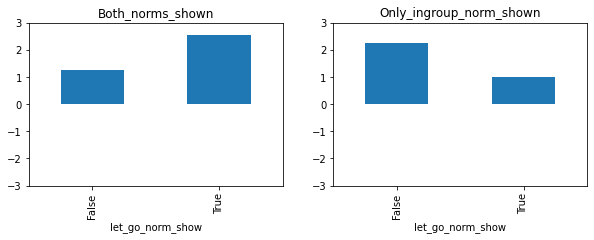

In [21]:
# plot means of choice for every condition with barplot which looks shitty
fig, ax = plt.subplots(1,2, figsize=(10,3))

mean_ingroup[False].plot.bar(title="Both_norms_shown", ax=ax[0], ylim=[-3,3])
mean_ingroup[True].plot.bar(title="Only_ingroup_norm_shown", ax=ax[1], ylim=[-3,3]);

In [22]:
tmp = pd.DataFrame(mean_ingroup).reset_index()
tmp

,only_ingroup_norm_show,let_go_norm_show,preference
0,False,False,1.272727
1,False,True,2.555556
2,True,False,2.250000
3,True,True,1.000000


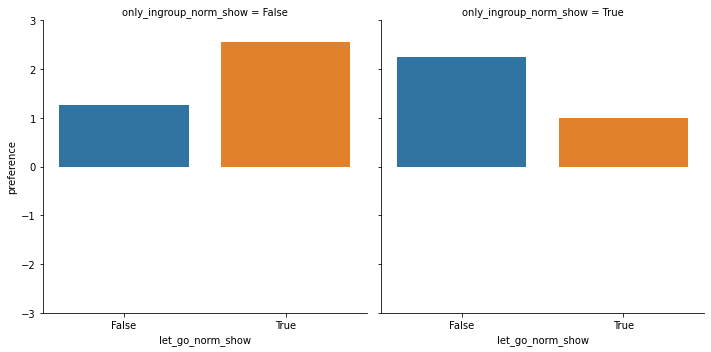

In [23]:
sns.catplot(x="let_go_norm_show", y="preference", col="only_ingroup_norm_show", data=tmp, kind="bar").set(ylim=[-3,3])

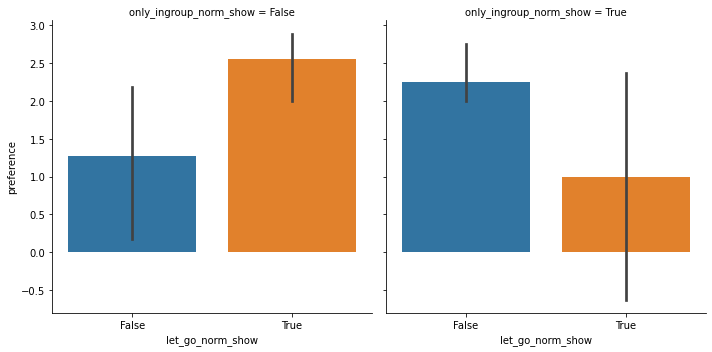

In [24]:
p = sns.catplot(x="let_go_norm_show", y="preference", col="only_ingroup_norm_show", data=clean_df, kind="bar")

#p.set_titles(row_template = 'row', col_template = 'col')

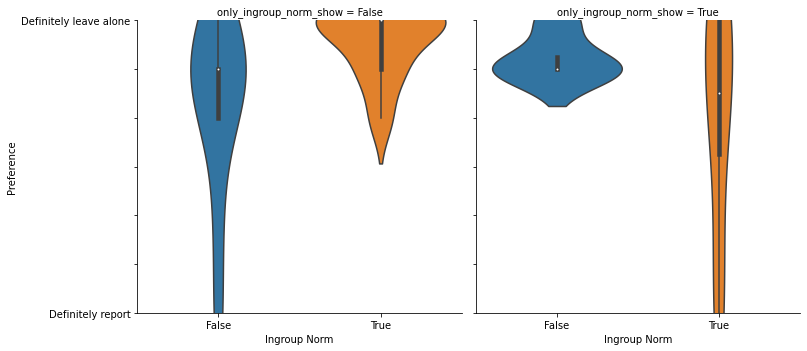

In [25]:
p = sns.catplot(x="let_go_norm_show", y="preference", col="only_ingroup_norm_show", data=clean_df, kind="violin").set(ylim=[-3,3])
p.set_axis_labels("Ingroup Norm", "Preference")
p.set_yticklabels(['Definitely report','','','','','','Definitely leave alone'])

Text(0.5, 1.0, 'Only Ingroup Norm ')

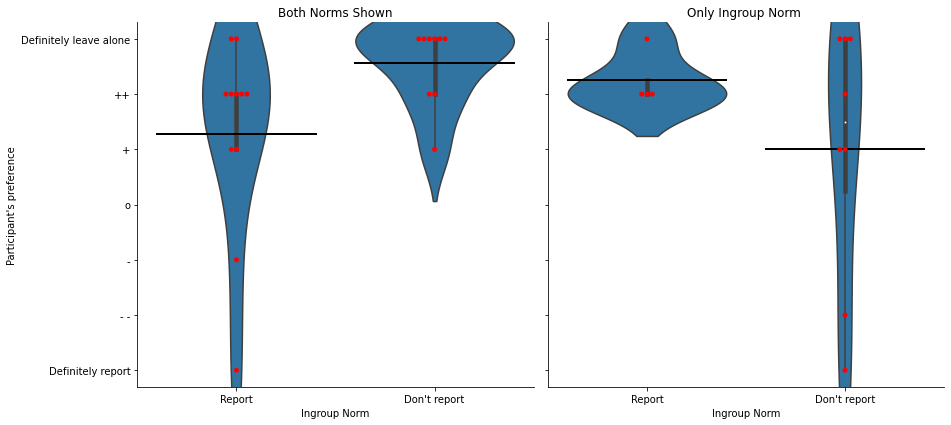

In [26]:
g = sns.FacetGrid(data=clean_df, col ='only_ingroup_norm_show', height=6).set(ylim=[-3,3])

g.map_dataframe(sns.violinplot, x="let_go_norm_show", y="preference")

g.map_dataframe(sns.swarmplot, x="let_go_norm_show", y="preference", color="red")

g.map_dataframe(sns.boxplot, x="let_go_norm_show", y="preference", showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False,)
g.set_axis_labels("Ingroup Norm", "Participant's preference")
g.set_yticklabels(['Definitely report','- -','-','o','+','++','Definitely leave alone'])
# black line is mean, red dots are single participants

g.set(ylim=(-3.3, 3.3))

g.set_xticklabels(['Report', 'Don\'t report'])


axes = g.axes.flatten()
axes[0].set_title("Both Norms Shown")
axes[1].set_title("Only Ingroup Norm ")

## Working on the dataset again: make the dataset look like the one from the study.

In [27]:
clean_df.head()

question,"To ensure you understood the assignment, please click on which of the following statements is true.",preference,Which out of these topics do you care about the most?,statement,only_ingroup_norm_show,let_go_norm_show
submission_id,,,,,,
2729,Participants chose which action they preferred.,3,Political Orientation,4,False,True
2730,Participants chose which action they preferred.,2,Vaccine against Covid-19,5,False,False
2731,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,False,True
2732,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,True,False
2733,Participants chose which action they preferred.,3,Abortion,-5,False,False


In [28]:
assert len(set(clean_df["To ensure you understood the assignment, please click on which of the following statements is true."])) == 1
clean_df = clean_df.drop(columns=["To ensure you understood the assignment, please click on which of the following statements is true."])

In [29]:
clean_df["bothShown"] = ~clean_df["only_ingroup_norm_show"]
clean_df = clean_df.drop(columns=["only_ingroup_norm_show"])

In [30]:
clean_df.head(10)

question,preference,Which out of these topics do you care about the most?,statement,let_go_norm_show,bothShown
submission_id,,,,,
2729,3,Political Orientation,4,True,True
2730,2,Vaccine against Covid-19,5,False,True
2731,2,Vaccine against Covid-19,4,True,True
2732,2,Vaccine against Covid-19,4,False,False
2733,3,Abortion,-5,False,True
2734,3,Vaccine against Covid-19,5,False,False
2735,2,Vaccine against Covid-19,5,False,False
2737,2,Political Orientation,3,False,True
2738,1,Political Orientation,5,True,False


In [31]:
clean_df["ingroupAgree"] = (clean_df["let_go_norm_show"] & (clean_df["preference"] > 0)) | (~clean_df["let_go_norm_show"] & (clean_df["preference"] < 0))

In [32]:
clean_df.head(10)

question,preference,Which out of these topics do you care about the most?,statement,let_go_norm_show,bothShown,ingroupAgree
submission_id,,,,,,
2729,3,Political Orientation,4,True,True,True
2730,2,Vaccine against Covid-19,5,False,True,False
2731,2,Vaccine against Covid-19,4,True,True,True
2732,2,Vaccine against Covid-19,4,False,False,False
2733,3,Abortion,-5,False,True,False
2734,3,Vaccine against Covid-19,5,False,False,False
2735,2,Vaccine against Covid-19,5,False,False,False
2737,2,Political Orientation,3,False,True,False
2738,1,Political Orientation,5,True,False,True


In [35]:
clean_df["outgroupDisagree"] = ~clean_df["ingroupAgree"]
clean_df["ingroupNorm"] = clean_df["let_go_norm_show"]
clean_df = clean_df.drop(columns="let_go_norm_show")
clean_df.head(10)

question,preference,Which out of these topics do you care about the most?,statement,bothShown,ingroupAgree,outgroupDisagree,ingroupNorm
submission_id,,,,,,,
2729,3,Political Orientation,4,True,True,False,True
2730,2,Vaccine against Covid-19,5,True,False,True,False
2731,2,Vaccine against Covid-19,4,True,True,False,True
2732,2,Vaccine against Covid-19,4,False,False,True,False
2733,3,Abortion,-5,True,False,True,False
2734,3,Vaccine against Covid-19,5,False,False,True,False
2735,2,Vaccine against Covid-19,5,False,False,True,False
2737,2,Political Orientation,3,True,False,True,False
2738,1,Political Orientation,5,False,True,False,True


In [37]:
clean_df.to_csv("df_for_modeling.csv")